C:\Users\Mohammad Rihan\AppData\Local\Temp\ipykernel_20436\82743535.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_certification'].fillna('Unrated', inplace=True)
C:\Users\Mohammad Rihan\AppData\Local\Temp\ipykernel_20436\82743535.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

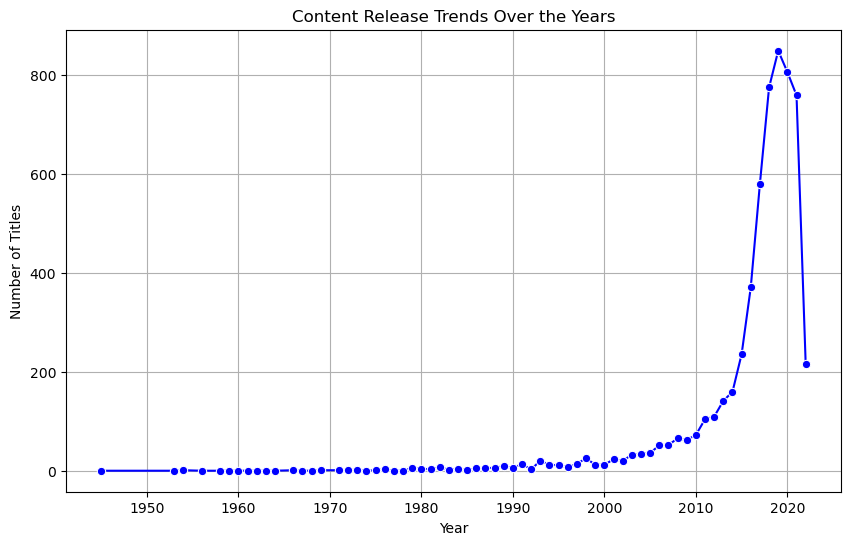

C:\Users\Mohammad Rihan\AppData\Local\Temp\ipykernel_20436\82743535.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


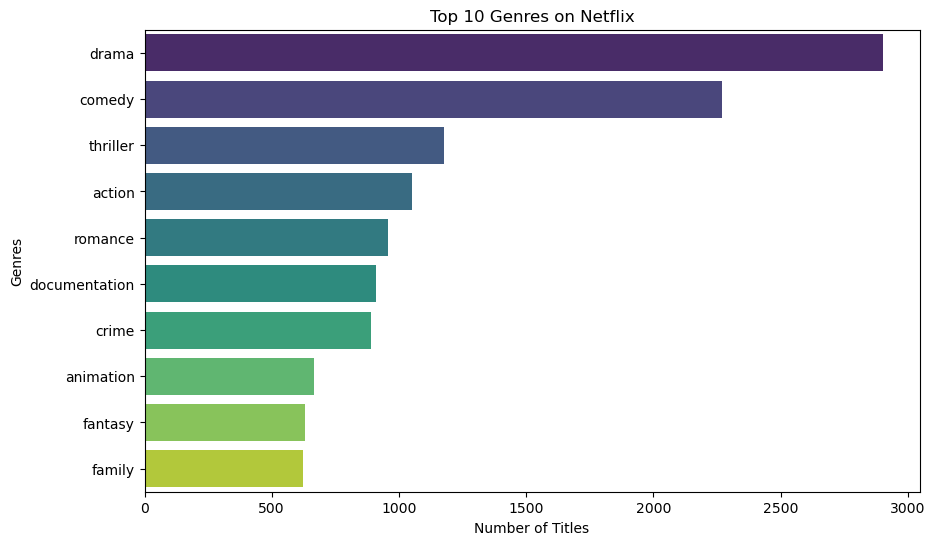

C:\Users\Mohammad Rihan\AppData\Local\Temp\ipykernel_20436\82743535.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


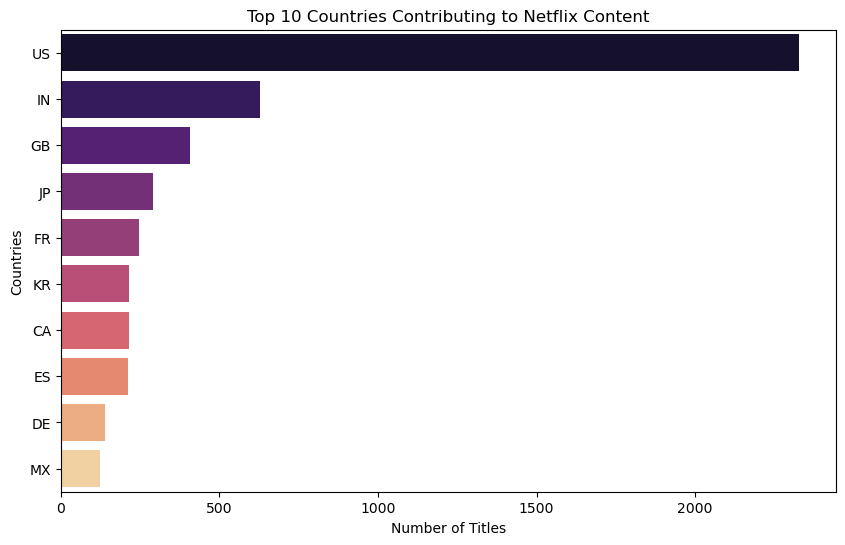

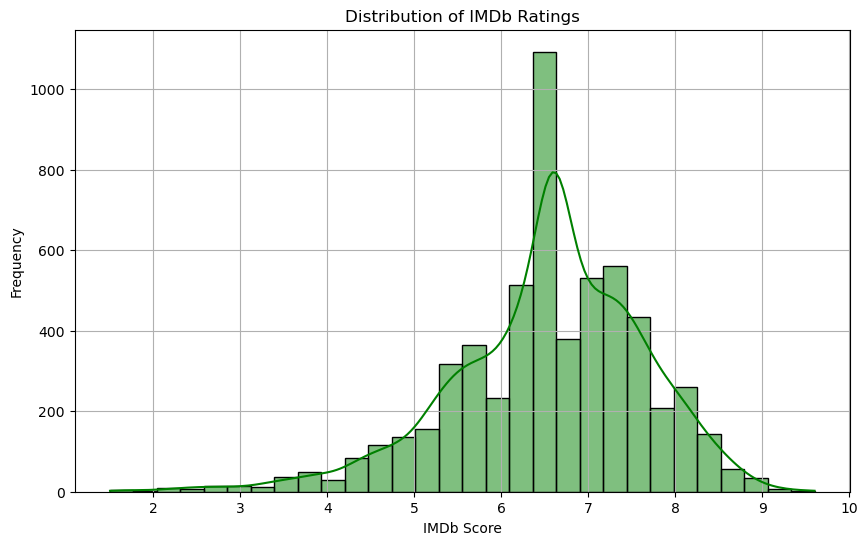

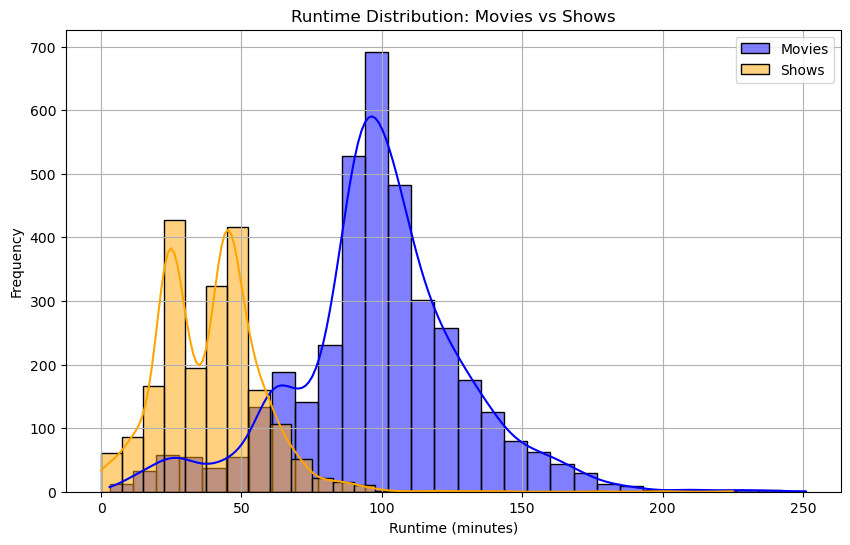

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\Mohammad Rihan\Downloads\raw_titles.csv"
df = pd.read_csv(file_path)
df['age_certification'].fillna('Unrated', inplace=True)
df['imdb_score'].fillna(df['imdb_score'].median(), inplace=True)
df['imdb_votes'].fillna(0, inplace=True)
df['genres'] = df['genres'].apply(eval)
df['production_countries'] = df['production_countries'].apply(eval)

content_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker="o", color="blue")
plt.title("Content Release Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid()
plt.show()

all_genres = df['genres'].explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.show()

all_countries = df['production_countries'].explode()
top_countries = all_countries.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Countries")
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=30, kde=True, color="green")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()

movies = df[df['type'] == 'MOVIE']
shows = df[df['type'] == 'SHOW']

plt.figure(figsize=(10, 6))
sns.histplot(movies['runtime'], bins=30, color="blue", label="Movies", kde=True)
sns.histplot(shows['runtime'], bins=30, color="orange", label="Shows", kde=True)
plt.title("Runtime Distribution: Movies vs Shows")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()